In [309]:
"""OpenWeatherMap-randomization

This module employs Python requests, APIs, and JSON traversals to answer a fundamental question: what weather trends can
we observe as we approach the equator? Using the Citipy library and OpenWeatherMap API, this script creates a representative
model of weather across world cities.

The program randomly generates 1500 latitude/longitude pairs and feeds them to the OpenWeatherMapAPI. It performs a
series of successive throttled API calls to extract the weather data in all found cities. It then drops duplicate 
cities, counts the total, and saves the resulting table as a CSV.

To showcase the following relationships, it builds a series of scatter plots using Matplotlib:

Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude

Finally, in addition to the city data CSV, it returns the scatterplots as png image files.

Helpful documentation:
citipy library - http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm
OpenWeatherMap API - https://pypi.python.org/pypi/citipy
geographical coordinate system - https://openweathermap.org/api


"""

'OpenWeatherMap-randomization\n\nThis module employs Python requests, APIs, and JSON traversals to answer a fundamental question: what weather trends can\nwe observe as we approach the equator? Using the Citipy library and OpenWeatherMap API, this script creates a representative\nmodel of weather across world cities.\n\nThe program randomly generates 1500 latitude/longitude pairs and feeds them to the OpenWeatherMapAPI. It performs a\nseries of successive throttled API calls to extract the weather data in all found cities. It then drops duplicate \ncities, counts the total, and saves the resulting table as a CSV.\n\nTo showcase the following relationships, it builds a series of scatter plots using Matplotlib:\n\nTemperature (F) vs. Latitude\nHumidity (%) vs. Latitude\nCloudiness (%) vs. Latitude\nWind Speed (mph) vs. Latitude\n\nFinally, in addition to the city data CSV, it returns the scatterplots as png image files.\n\nHelpful documentation:\ncitipy library - http://desktop.arcgis.co

# Analysis

* Max temperatures peak around latitudes clustered around the equator (0 degrees). The temperature plot is not an inverted parabola as expected, i.e. low temperatures are not evenly exhibited in both the highest and lowest latitudes. This makes sense given hemisphere seasonality -- depending on time of year, either the lowest or highest latitudes should exhibit an uptick based on where it's summer.
* Humidity is mostly evenly distributed across latitudes. Some runs of the program showed very low humidities between -25 and 25 degrees.
* Cloudiness distribution appears highly randomized.
* Windspeed appears to increase at the extreme latitudes, possibly exhibiting seasonality like max temperature. Windspeeds appear slightly higher on the extreme side currently with lower max temperatures (winter). It could be useful to further examine the seasonal relationship between temperature and windspeed.

In [305]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import requests
import datetime
import time
from citipy import citipy

#Retrieve API keys
from config import api_key

In [306]:
# Randomly generate 1500 latitude/longitude pairs
samples = 1500
lats = np.random.uniform(low=-90.000, high=90.000, size=samples) 
lngs = np.random.uniform(low=-180.000, high=180.000, size=samples)

# Convert to list for iteration
lats = list(lats)
lngs = list(lngs)


In [307]:
# Create empty lists to hold weather data for found cities
cities = []
countries = []
timestamps = []
dates = []
max_temps = []
humidities = []
windspeeds = []
cloudiness = []


# Iterate through lat/long pairs, feeding to Citipy to generate nearest city name for later use with OpenWeatherMap
j = 0
while j < len(lats):
    print(lats[j], lngs[j])
    
    one_city = citipy.nearest_city(lats[j], lngs[j])
    city_name = one_city.city_name
    city_country_code = one_city.country_code
    
    print(f'Processing Record {j+1} of Set 1 | {city_name}')
    
    # Use city name to build OpenWeatherMap API query
    
    query = city_name + ',' + city_country_code
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
            "q": query,
            "units": "IMPERIAL",
            "mode": "json",
            "APPID": api_key
            }
    response = requests.get(base_url, params=params)
    city_weather = response.json()

    # Use try/except to skip cities not found by both Citipy and OpenWeatherMap
    # If contained in OpenWeatherMap data, parse JSON for city weather data and append to respective lists 
    try:

        timestamps.append(city_weather['dt'])
        dates.append(datetime.datetime.fromtimestamp\
                     (int(city_weather['dt'])).strftime('%m-%d-%Y'))
        max_temps.append(city_weather['main']['temp'])
        humidities.append(city_weather['main']['humidity'])
        windspeeds.append(city_weather['wind']['speed'])
        cloudiness.append(city_weather['clouds']['all'])
        
        cities.append(one_city.city_name)
        countries.append(one_city.country_code)
        
        j += 1
    
    # If city not found in OpenWeatherMap, report it
    except KeyError:
        del lats[j]
        del lngs[j]
        print("Oops, that city doesn't exist in OpenWeatherMap.")
    
    # Slow the loop down by waiting 2 seconds to conform to OpenWeatherMap's limitation of 60 requests per minute
    time.sleep(2)

-17.4028740197 36.1812674629
Processing Record 1 of Set 1 | quelimane
-28.0621492479 -176.011470618
Processing Record 2 of Set 1 | vaini
70.9452530373 146.96207524
Processing Record 3 of Set 1 | chokurdakh
-38.1698721246 -73.4691202368
Processing Record 4 of Set 1 | canete
26.247892803 145.265614403
Processing Record 5 of Set 1 | katsuura
-6.56762567778 -82.8933309173
Processing Record 6 of Set 1 | sechura
34.2487999469 81.7490437401
Processing Record 7 of Set 1 | leh
-72.2613807939 -42.286647366
Processing Record 8 of Set 1 | ushuaia
-70.3577581492 -130.564514935
Processing Record 9 of Set 1 | rikitea
44.2805188971 -67.3621982541
Processing Record 10 of Set 1 | bar harbor
-17.8105661668 -91.4871254003
Processing Record 11 of Set 1 | hualmay
73.8928301558 -174.145641599
Processing Record 12 of Set 1 | mys shmidta
Oops, that city doesn't exist in OpenWeatherMap.
36.3025539076 -7.4815753637
Processing Record 12 of Set 1 | olhao
-38.795327888 -46.5351541132
Processing Record 13 of Set 1 |

-81.4976988282 -12.4518457928
Processing Record 100 of Set 1 | cape town
-41.4222514219 -69.3773883065
Processing Record 101 of Set 1 | san carlos de bariloche
58.0774838005 -49.4529692288
Processing Record 102 of Set 1 | paamiut
43.8358079085 158.347432074
Processing Record 103 of Set 1 | severo-kurilsk
-38.6673511288 -159.81802672
Processing Record 104 of Set 1 | avarua
55.6535333864 99.6399702201
Processing Record 105 of Set 1 | lesogorsk
5.55199422769 -166.632484503
Processing Record 106 of Set 1 | makakilo city
-21.7645256143 106.484059229
Processing Record 107 of Set 1 | carnarvon
-54.1986653199 16.0485293482
Processing Record 108 of Set 1 | hermanus
71.0161161374 -96.341916153
Processing Record 109 of Set 1 | thompson
-70.6213953261 -87.0037371989
Processing Record 110 of Set 1 | punta arenas
34.8421116698 43.9095603523
Processing Record 111 of Set 1 | tikrit
69.0112682837 -105.754117132
Processing Record 112 of Set 1 | yellowknife
-77.3657933808 -108.985456164
Processing Record

42.605372687 131.696631748
Processing Record 197 of Set 1 | popova
-39.4799719903 -88.6657611283
Processing Record 198 of Set 1 | ancud
-35.6524349766 -81.4971409632
Processing Record 199 of Set 1 | lebu
33.0767764142 30.6721900209
Processing Record 200 of Set 1 | rosetta
-30.6105665661 90.2887243708
Processing Record 201 of Set 1 | carnarvon
-1.40030855494 100.876718531
Processing Record 202 of Set 1 | solok
-59.9511232071 143.271494354
Processing Record 203 of Set 1 | hobart
-70.787334605 -168.332237396
Processing Record 204 of Set 1 | vaini
-84.2937381994 -105.848667148
Processing Record 205 of Set 1 | punta arenas
82.2884109453 -153.910951354
Processing Record 206 of Set 1 | barrow
-74.8186884557 -99.0047079688
Processing Record 207 of Set 1 | punta arenas
-80.4892202297 177.58470108
Processing Record 208 of Set 1 | kaitangata
Oops, that city doesn't exist in OpenWeatherMap.
-17.7796642551 -37.1192612322
Processing Record 208 of Set 1 | caravelas
53.6647652678 -95.7623510749
Proces

-84.4746552872 2.11390378207
Processing Record 296 of Set 1 | hermanus
-69.3488404737 -122.969638746
Processing Record 297 of Set 1 | rikitea
84.2276218577 -87.4893981535
Processing Record 298 of Set 1 | qaanaaq
-34.9985919818 3.9807719304
Processing Record 299 of Set 1 | luderitz
66.7249973722 -175.75001237
Processing Record 300 of Set 1 | provideniya
9.98868013673 -104.449140028
Processing Record 301 of Set 1 | ixtapa
-54.0032207255 -167.475427711
Processing Record 302 of Set 1 | avarua
-89.8372166596 73.737550923
Processing Record 303 of Set 1 | busselton
64.6699928173 40.4888624152
Processing Record 304 of Set 1 | arkhangelsk
3.4834090513 5.23529323399
Processing Record 305 of Set 1 | yenagoa
55.4878499403 145.106710816
Processing Record 306 of Set 1 | okha
-8.92549438367 -87.2248609993
Processing Record 307 of Set 1 | paita
-16.7148749632 53.7539424631
Processing Record 308 of Set 1 | ambodifototra
Oops, that city doesn't exist in OpenWeatherMap.
-63.2296133102 -120.76244213
Proce

4.51621326705 78.7916238236
Processing Record 395 of Set 1 | galle
-82.8900072306 102.180934732
Processing Record 396 of Set 1 | albany
52.7815059593 -134.181844463
Processing Record 397 of Set 1 | ketchikan
72.534476131 -133.99434279
Processing Record 398 of Set 1 | tuktoyaktuk
47.4392316564 -44.4660683024
Processing Record 399 of Set 1 | torbay
-23.1055244956 -104.413154638
Processing Record 400 of Set 1 | puerto ayora
-18.3362513767 30.1803009742
Processing Record 401 of Set 1 | chegutu
-40.2168736669 -169.006154932
Processing Record 402 of Set 1 | vaini
-71.9320842956 -68.266064397
Processing Record 403 of Set 1 | ushuaia
-51.840259129 -96.0160627607
Processing Record 404 of Set 1 | castro
-15.2327849174 170.715253235
Processing Record 405 of Set 1 | lakatoro
67.2329432168 101.595826018
Processing Record 406 of Set 1 | tura
5.71232388639 123.299952745
Processing Record 407 of Set 1 | palimbang
40.0669725343 3.89825283692
Processing Record 408 of Set 1 | mahon
Oops, that city doesn'

53.765401066 -88.9370464591
Processing Record 487 of Set 1 | geraldton
14.6701429687 152.897702535
Processing Record 488 of Set 1 | kavieng
-70.1369167338 45.909693323
Processing Record 489 of Set 1 | port alfred
-1.07620262328 169.422782677
Processing Record 490 of Set 1 | tabiauea
Oops, that city doesn't exist in OpenWeatherMap.
-70.5668733807 15.7323726894
Processing Record 490 of Set 1 | bredasdorp
-46.019979593 86.1727573031
Processing Record 491 of Set 1 | busselton
-20.3047098569 -136.591360943
Processing Record 492 of Set 1 | rikitea
-1.92886610405 -21.0776929373
Processing Record 493 of Set 1 | georgetown
-82.3589932459 -54.5425953139
Processing Record 494 of Set 1 | ushuaia
25.651110359 30.3662601199
Processing Record 495 of Set 1 | tahta
19.952710735 163.999958913
Processing Record 496 of Set 1 | butaritari
-65.0468074036 -61.9989305446
Processing Record 497 of Set 1 | ushuaia
-60.5448192606 -170.269143619
Processing Record 498 of Set 1 | vaini
9.39777185006 26.5789831544
Pr

-59.7832666703 14.5730605045
Processing Record 571 of Set 1 | hermanus
87.351824641 -32.7689921611
Processing Record 572 of Set 1 | illoqqortoormiut
Oops, that city doesn't exist in OpenWeatherMap.
-25.3844631744 -3.20231045232
Processing Record 572 of Set 1 | jamestown
-19.799460973 -141.194466126
Processing Record 573 of Set 1 | rikitea
-17.5468446027 147.830210343
Processing Record 574 of Set 1 | innisfail
-57.2976049807 -76.7874982591
Processing Record 575 of Set 1 | punta arenas
83.0341729836 143.580478165
Processing Record 576 of Set 1 | chokurdakh
74.3243015585 158.107772456
Processing Record 577 of Set 1 | cherskiy
21.8063438083 -100.218725543
Processing Record 578 of Set 1 | fernandez
Oops, that city doesn't exist in OpenWeatherMap.
13.7140972025 -155.854094777
Processing Record 578 of Set 1 | hilo
58.5896900545 -86.08556067
Processing Record 579 of Set 1 | attawapiskat
Oops, that city doesn't exist in OpenWeatherMap.
-15.8503164127 -21.1684013676
Processing Record 579 of Set 

52.4445943124 -112.308517138
Processing Record 662 of Set 1 | stettler
-30.1372892768 -10.7754825311
Processing Record 663 of Set 1 | jamestown
16.2249941301 169.901590422
Processing Record 664 of Set 1 | butaritari
-89.3531394536 158.232269035
Processing Record 665 of Set 1 | bluff
14.6000714225 106.29884491
Processing Record 666 of Set 1 | champasak
-29.7977133813 137.217983866
Processing Record 667 of Set 1 | port augusta
44.5033592522 -112.673810848
Processing Record 668 of Set 1 | dillon
-88.2815566232 15.9433300107
Processing Record 669 of Set 1 | bredasdorp
61.3998629802 179.325504555
Processing Record 670 of Set 1 | beringovskiy
33.6335452601 34.2688441325
Processing Record 671 of Set 1 | sur
Oops, that city doesn't exist in OpenWeatherMap.
-71.8695842753 20.0679595067
Processing Record 671 of Set 1 | bredasdorp
-58.6339082358 -101.036401142
Processing Record 672 of Set 1 | punta arenas
9.51784570916 -107.620942787
Processing Record 673 of Set 1 | coahuayana
-44.1066669345 41.6

-65.2812376599 -137.073127563
Processing Record 747 of Set 1 | rikitea
-38.0842702264 -172.308733206
Processing Record 748 of Set 1 | vaini
-75.9969125674 118.754457708
Processing Record 749 of Set 1 | albany
-40.7476642574 -135.636869885
Processing Record 750 of Set 1 | rikitea
70.7444357551 48.4011329843
Processing Record 751 of Set 1 | belushya guba
Oops, that city doesn't exist in OpenWeatherMap.
-21.5692651219 177.99159361
Processing Record 751 of Set 1 | isangel
79.6992342054 164.617601784
Processing Record 752 of Set 1 | cherskiy
60.6659790842 -120.776374289
Processing Record 753 of Set 1 | fort nelson
19.0346097449 98.5663370811
Processing Record 754 of Set 1 | sansai
Oops, that city doesn't exist in OpenWeatherMap.
64.2690870678 161.584055963
Processing Record 754 of Set 1 | evensk
85.5787221836 -107.86764743
Processing Record 755 of Set 1 | yellowknife
-69.9254283641 -135.143072281
Processing Record 756 of Set 1 | rikitea
16.3528919811 51.6476789724
Processing Record 757 of S

11.9538580118 -174.034133996
Processing Record 831 of Set 1 | kapaa
-78.6618320185 162.972503134
Processing Record 832 of Set 1 | bluff
30.2105874811 95.6536866355
Processing Record 833 of Set 1 | pasighat
76.7779729051 60.5524375039
Processing Record 834 of Set 1 | amderma
Oops, that city doesn't exist in OpenWeatherMap.
-7.32278105014 7.90732383615
Processing Record 834 of Set 1 | soyo
Oops, that city doesn't exist in OpenWeatherMap.
-46.1596685736 38.8313302179
Processing Record 834 of Set 1 | east london
-44.4309231726 -137.443230062
Processing Record 835 of Set 1 | rikitea
-84.2326581086 87.0690559727
Processing Record 836 of Set 1 | busselton
-82.3954207599 87.3116933699
Processing Record 837 of Set 1 | busselton
15.48388243 105.951615662
Processing Record 838 of Set 1 | pakxe
-38.1574158739 6.54186159395
Processing Record 839 of Set 1 | saldanha
28.8821618379 -13.6520305805
Processing Record 840 of Set 1 | tias
24.9673527205 107.178505018
Processing Record 841 of Set 1 | jinchen

58.6726435606 -174.486323118
Processing Record 913 of Set 1 | provideniya
-84.6178154821 32.0757360067
Processing Record 914 of Set 1 | port elizabeth
-59.346102518 109.347321714
Processing Record 915 of Set 1 | albany
-75.939697135 -140.903211976
Processing Record 916 of Set 1 | rikitea
12.1403654411 -96.490874536
Processing Record 917 of Set 1 | pochutla
Oops, that city doesn't exist in OpenWeatherMap.
19.5379096898 -156.279363237
Processing Record 917 of Set 1 | hilo
9.12153256702 -120.77782448
Processing Record 918 of Set 1 | cabo san lucas
-87.8917448024 -10.8299956753
Processing Record 919 of Set 1 | hermanus
61.6101038139 172.22585127
Processing Record 920 of Set 1 | kamenskoye
Oops, that city doesn't exist in OpenWeatherMap.
7.75814949562 -18.0739951815
Processing Record 920 of Set 1 | bubaque
-82.4734782708 24.7775829043
Processing Record 921 of Set 1 | bredasdorp
79.8574578021 41.4892049489
Processing Record 922 of Set 1 | ostrovnoy
-57.0747947813 -42.9896319758
Processing Re

-71.5517892965 90.5479401968
Processing Record 998 of Set 1 | busselton
65.3687183735 168.195868643
Processing Record 999 of Set 1 | bilibino
-20.8897638581 142.84743838
Processing Record 1000 of Set 1 | mount isa
38.1137693135 -105.510909204
Processing Record 1001 of Set 1 | canon city
-67.3687601761 -146.464375613
Processing Record 1002 of Set 1 | mataura
Oops, that city doesn't exist in OpenWeatherMap.
-20.5175544439 69.9035319841
Processing Record 1002 of Set 1 | grand river south east
Oops, that city doesn't exist in OpenWeatherMap.
-5.65069929966 -157.328785163
Processing Record 1002 of Set 1 | faanui
-86.4020061881 -106.959796769
Processing Record 1003 of Set 1 | punta arenas
54.4707277593 -21.2488495006
Processing Record 1004 of Set 1 | vestmannaeyjar
-84.1057583765 -60.4123524167
Processing Record 1005 of Set 1 | ushuaia
-21.8463219145 35.4698529768
Processing Record 1006 of Set 1 | maxixe
-79.3946566369 8.11992637097
Processing Record 1007 of Set 1 | hermanus
70.8327176506 16

-3.18229694448 152.710591176
Processing Record 1088 of Set 1 | namatanai
62.3874209048 29.2059476981
Processing Record 1089 of Set 1 | joensuu
37.0391168178 93.5478551359
Processing Record 1090 of Set 1 | yumen
-13.6360775438 127.091635583
Processing Record 1091 of Set 1 | port keats
-84.1902774681 -16.5734822712
Processing Record 1092 of Set 1 | ushuaia
-85.0702581435 69.3475647181
Processing Record 1093 of Set 1 | taolanaro
Oops, that city doesn't exist in OpenWeatherMap.
-43.1015139042 53.3141616137
Processing Record 1093 of Set 1 | taolanaro
Oops, that city doesn't exist in OpenWeatherMap.
-30.0163332058 2.48563061931
Processing Record 1093 of Set 1 | luderitz
72.3749351356 -119.35021274
Processing Record 1094 of Set 1 | norman wells
21.1234248439 -141.674812265
Processing Record 1095 of Set 1 | hilo
-76.5740178517 38.1929031031
Processing Record 1096 of Set 1 | port alfred
58.2103323753 -152.670512466
Processing Record 1097 of Set 1 | kodiak
31.0581199045 115.686773521
Processing 

-12.6426611855 151.9616408
Processing Record 1183 of Set 1 | samarai
-51.3653165123 62.5091545075
Processing Record 1184 of Set 1 | taolanaro
Oops, that city doesn't exist in OpenWeatherMap.
-36.9627705732 77.6262790182
Processing Record 1184 of Set 1 | bambous virieux
-68.6342616781 174.415882857
Processing Record 1185 of Set 1 | kaitangata
Oops, that city doesn't exist in OpenWeatherMap.
-30.8946415161 97.3867027812
Processing Record 1185 of Set 1 | carnarvon
-56.6583012728 -155.777084777
Processing Record 1186 of Set 1 | mataura
Oops, that city doesn't exist in OpenWeatherMap.
28.9464506186 -139.310625985
Processing Record 1186 of Set 1 | hilo
71.3659816163 -140.707454474
Processing Record 1187 of Set 1 | aklavik
-64.9233872149 131.094933679
Processing Record 1188 of Set 1 | new norfolk
13.1796609251 -5.5609556829
Processing Record 1189 of Set 1 | san
-31.0813956022 -131.729044212
Processing Record 1190 of Set 1 | rikitea
-64.2857982256 -119.546361197
Processing Record 1191 of Set 1

-17.0666748366 -121.537459759
Processing Record 1268 of Set 1 | rikitea
66.8162406205 166.551248374
Processing Record 1269 of Set 1 | bilibino
20.435494278 64.9206546094
Processing Record 1270 of Set 1 | dwarka
-73.2863352601 147.752510305
Processing Record 1271 of Set 1 | hobart
10.1692134426 129.22191571
Processing Record 1272 of Set 1 | pilar
-22.7673221331 -159.272986824
Processing Record 1273 of Set 1 | avarua
-65.886014036 -53.7063018627
Processing Record 1274 of Set 1 | ushuaia
33.8955365976 168.541367857
Processing Record 1275 of Set 1 | severo-kurilsk
-71.0310308712 48.4125570086
Processing Record 1276 of Set 1 | port alfred
80.8275235332 178.773879604
Processing Record 1277 of Set 1 | leningradskiy
-73.2112659941 -163.64564281
Processing Record 1278 of Set 1 | mataura
Oops, that city doesn't exist in OpenWeatherMap.
-45.0569264264 40.8220044069
Processing Record 1278 of Set 1 | umzimvubu
Oops, that city doesn't exist in OpenWeatherMap.
64.8972905012 30.9542634267
Processing R

In [296]:
# Create and populate summary dataframe

summary_df = pd.DataFrame({'City':cities,
                           'Country':countries,
                           'Latitude':lats,
                           'Longitude':lngs,
                           'Timestamp':timestamps,
                           'Date':dates,
                           'Max Temperature':max_temps,
                           'Humidity':humidities,
                           'Windspeed':windspeeds,
                           'Cloudiness':cloudiness
                          })

# Constrain data to unique cities
summary_df.drop_duplicates()

# Configure dataframe column order and display
summary_df = summary_df[['City',
                         'Country',
                         'Latitude',
                         'Longitude',
                         'Timestamp',
                         'Date',
                         'Max Temperature',
                         'Humidity',
                         'Windspeed',
                         'Cloudiness']]

summary_df

,City,Country,Latitude,Longitude,Timestamp,Date,Max Temperature,Humidity,Windspeed,Cloudiness
0,port alfred,za,-71.460689,41.323325,1511277040,11-21-2017,67.75,85,17.02,0
1,san patricio,mx,13.143887,-108.930492,1511272020,11-21-2017,75.20,94,3.15,20
2,tulum,mx,18.767706,-86.521111,1511271600,11-21-2017,77.00,78,2.37,5
3,aguas belas,br,-9.070107,-37.227860,1511276966,11-21-2017,91.38,36,9.86,8
4,bredasdorp,za,-40.426650,21.614013,1511272800,11-21-2017,68.00,45,19.46,48
5,khatanga,ru,85.331334,94.838027,1511277042,11-21-2017,-3.22,77,3.49,64
6,bima,id,-7.762703,118.060211,1511277024,11-21-2017,77.43,100,3.27,88
7,rikitea,pf,-86.464802,-136.159612,1511277043,11-21-2017,73.60,100,13.22,68
8,punta arenas,cl,-52.877178,-75.162463,1511272800,11-21-2017,51.80,53,28.86,75
9,rikitea,pf,-63.999575,-128.702328,1511277043,11-21-2017,73.60,100,13.22,68


In [316]:
# Count number of records found

city_count = len(summary_df)

print(f'Number of cities: {city_count}')

Number of cities: 1274


In [317]:
# Save DataFrame as a csv

summary_df.to_csv("OpenWeatherMap-analysis.csv", encoding="utf-8", index=False)

# Latitude vs. Temperature Plot

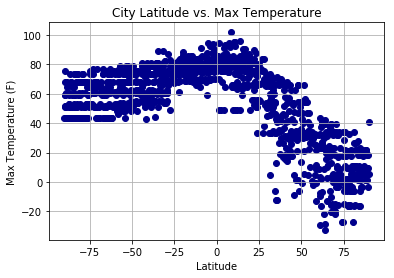

In [311]:
# Create scatterplot

plt.scatter(summary_df['Latitude'], 
            summary_df['Max Temperature'], color='darkblue')

# Set textual properties

plt.title(f'City Latitude vs. Max Temperature')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.show()

# Latitude vs. Humidity Plot

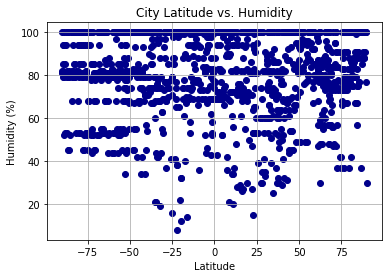

In [312]:
# Create scatterplot

plt.scatter(summary_df['Latitude'], 
            summary_df['Humidity'], color='darkblue')

# Set textual properties

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.show()

# Latitude vs. Cloudiness Plot

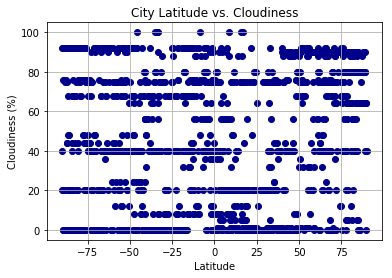

In [313]:
# Create scatterplot

plt.scatter(summary_df['Latitude'], 
            summary_df['Cloudiness'], color='darkblue')

# Set textual properties

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.show()

# Latitude vs. Windspeed Plot

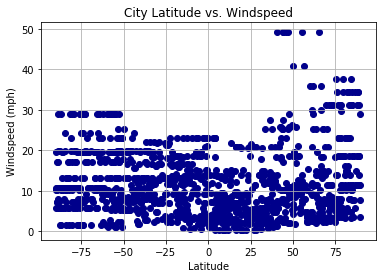

In [314]:
# Create scatterplot

plt.scatter(summary_df['Latitude'], 
            summary_df['Windspeed'], color='darkblue')

# Set textual properties

plt.title("City Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid(True)

plt.show()